# Explore here

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [17]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(URL)
df.to_csv('../data/raw/raw_data.csv', index = False)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## The problem

we will try to study the behavior of the data to see which factors are relevant for the prediction of it.

## descriptive analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [19]:
duplicates = df.id.duplicated().sum()
nbhd_group_values = df.neighbourhood_group.value_counts()
nbhd_values = df.neighbourhood.describe()

print(
    f'The data has {duplicates} duplicates \n\n'
    f'neighbourhood groups: \n{nbhd_group_values}\n\n'
    f'neighbourhoods: \n{nbhd_values}'
)

The data has 0 duplicates 

neighbourhood groups: 
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

neighbourhoods: 
count            48895
unique             221
top       Williamsburg
freq              3920
Name: neighbourhood, dtype: object


In [20]:
df.price.sort_values()

26841        0
25753        0
26866        0
25433        0
26259        0
         ...  
6530      9999
40433     9999
17692    10000
29238    10000
9151     10000
Name: price, Length: 48895, dtype: int64

In [21]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
nan_counts_rmp = df[~df.reviews_per_month.notna()].number_of_reviews.sum() 
nan_counts_lr = df[~df.last_review.notna()].number_of_reviews.sum() 

print(f'the values with nan reviews per month have {nan_counts_rmp} reviews')
print(f'the values with nan last review have {nan_counts_lr} reviews')

the values with nan reviews per month have 0 reviews
the values with nan last review have 0 reviews


In [23]:
df_description = df.describe()
df_description[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Data integrity

- As we can see, the data does not contain duplicates and has little null values. 
- The only columns with missing information are name, host_name, last_review and reviews_per_month.
- in the columns name, host_name, reviews_per_month and we can just rplace the values with "", "" and 0 respectively since we can assume that people just didn't put a name, and listings with nan reviews per month have 0 total reviews.
- for the case of the last_review column, it is not easy to know what to fill the values with, the reason thos values are nan is that they do not have any reviews yet, but we can't replace a a nan value with any specific date because that would make no sense so for that reason i choose to drop the entire column. 
- Categorical variables are room_type, neighborhood, and neighborhood_group.
- Numerical variables are price, munumum_nights, numver_of_reviwes_reviews_per_month, calculated_host_listings, latitude, host_id, id, longitude and availability_365. The variables last_review, host_name and name are technically numerical too.
- Some places have a price of 0 which doesn't make sense so we can just drop those.

In [24]:
df = df[df.price > 0]
df.drop(columns=['last_review'], inplace=True)
fill_dict = {
    'name':'',
    'host_name':'',
    'reviews_per_month':0
}
df.fillna(fill_dict, inplace = True)
df.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Univariate analysis

we will satart by making some plots

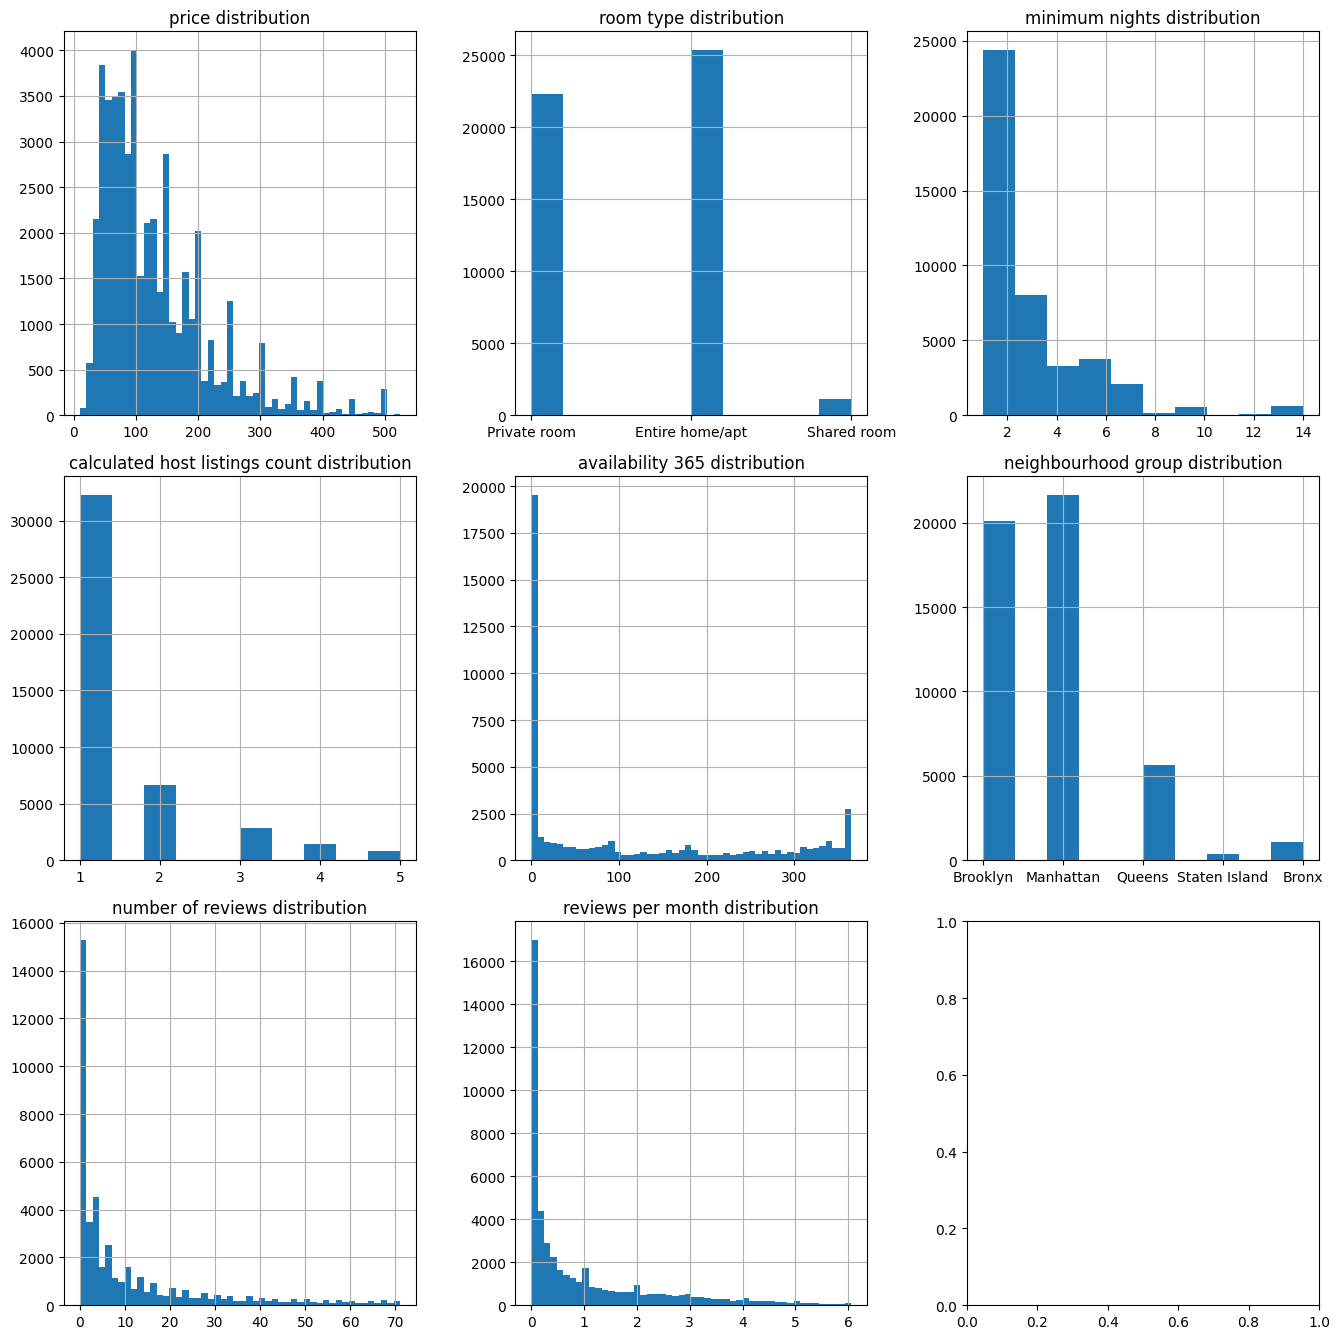

In [26]:
n = 3
m = 3
size_in = 4.5

fig, ax = plt.subplots(n,m)
fig.set_size_inches(size_in*m,size_in*n)

columns_to_graph = df[
    [
        'price',
        'room_type',
        'minimum_nights',
        'calculated_host_listings_count',
        'availability_365',
        'neighbourhood_group',
        'number_of_reviews',
        'reviews_per_month'
    ]
]

for index, column in enumerate(columns_to_graph):
    i, j = divmod(index, m)
    column_name = column.replace('_',' ')

    if column not in ['neighbourhood', 'neighbourhood_group', 'room_type']:
        # since the outliers are so big for each graph, i decided to graph only values that where less than 3 times
        # as big as the biggest value in the 75% percentile.
        # also the mask only applies for numerical variables
        mask = df[column] < df_description.loc['75%',column]*3 
    else:
        # for this variables the mask is different
        mask = df.index

    if column in [
        'minimum_nights',
        'calculated_host_listings_count',
        'neighbourhood_group',
        'room_type'
        ]:
        bins = None
    else:
        bins = 50
    
    ax[i,j].hist(df.loc[mask, column], bins=bins)
    ax[i,j].set_title(f'{column_name} distribution')
    ax[i,j].grid(True)

plt.tight_layout()
plt.show()

Important note: Values with a big deviation have been cut from some graphs of the price, minimum nights, reviews per month, total reviews and amount of host listings distribution so it is possible to appreciate the data near the mean in more detail.

### Descriptive analysis observations.

- Although the price per night is around 150 USD, there are a lot of outliers with prices in the thousands of USD.
- Most of the columns with numerical values have a big ammount of outliers.
- most places are in Brooklyn or Manhattan.
- the availability_365 column has a lot of 0 values (17533), it is unclear why but it might be because people set the availability to 0 because they were forced to put a value and 0 means that is actually available all the time.
- there are some places that require staying times that look crazy, there is a chance some are typos but it is likely that those places are intended to be rented like a normal house. 
- the columns id, host_id and host_name are probably unrelated to most predictions we would like to make from this dataset, but the column name may have information about the listing.
- the hosts with the biggest number of listings appear to be companies (the Hotel Sonder and the renting agency Blueground)
- Some of the highest prices in listings might be actual prices, like in the case of the luxury apartment in brooklyn (id = 13894339) but many of them may correspond to a missinterpretation of how the prices work like the furnished room at queens(id = 7003697), it seems that the 10000 USD price in the listing is not for a night but for the 100 days minimum required stay. Some others might be typos or propperties not intended for sataying as in a hotel like the film location at Brooklyn (id = 2953058)
- the most notable outliers in the number of reviews are cheap places, specially near some airport.



## Multivariate analysis


### numeric - numeric

from the graph we can't see very clear linear relationships between numerical variables, but if we pay atention we will se that the prices can be higher for some specific latitudes an longitudes, also places with more review tend to have mainly lower prices aparently.

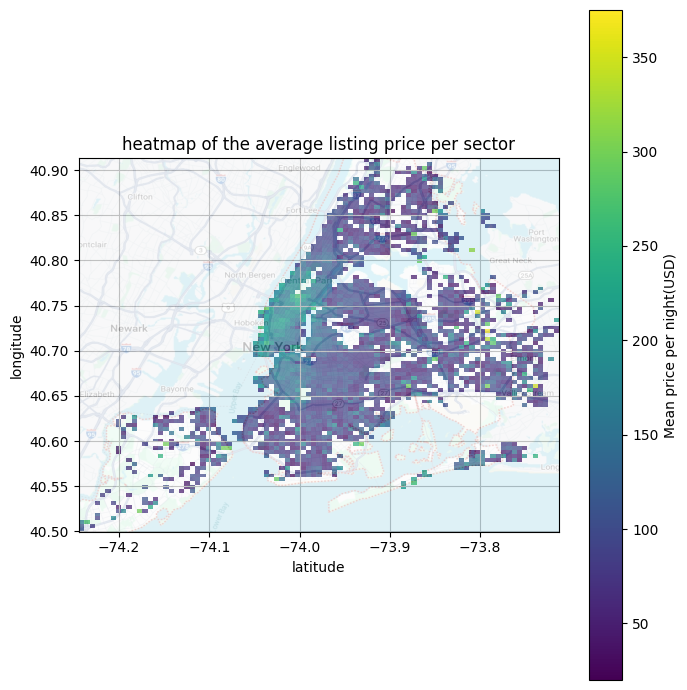

In [28]:
n = 100

img = Image.open('www.google.com-NYC.jpeg')
img = img.crop((150,100,1150,1000))

df_color = df[['price','latitude','longitude']].copy()
df_color = df[df.price < 400].copy() # dropped outliers so there is a contrast in the map

df_color['y_bin'] = pd.cut(df_color.latitude, bins=n, labels=False, include_lowest=True)
df_color['x_bin'] = pd.cut(df_color.longitude, bins=n, labels=False, include_lowest=True)

avg_price_grid = df_color.pivot_table(index='y_bin', columns='x_bin', values='price', aggfunc='mean')

x_min, x_max = df_color.longitude.min(), df_color.longitude.max()
y_min, y_max = df_color.latitude.min(), df_color.latitude.max()

fig, ax = plt.subplots(figsize=(7,7))

im = ax.imshow(avg_price_grid, origin='lower',
                extent=[x_min, x_max, y_min, y_max],
               alpha=1)
im_overlay = ax.imshow(img, origin='upper',
                       extent=[x_min, x_max, y_min, y_max],
                           alpha=0.3, zorder=2)


# 5. Add colorbar and labels
fig.colorbar(im, ax=ax, label='Mean price per night(USD)')
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_title('heatmap of the average listing price per sector')
ax.grid(True)


plt.tight_layout()
plt.show()

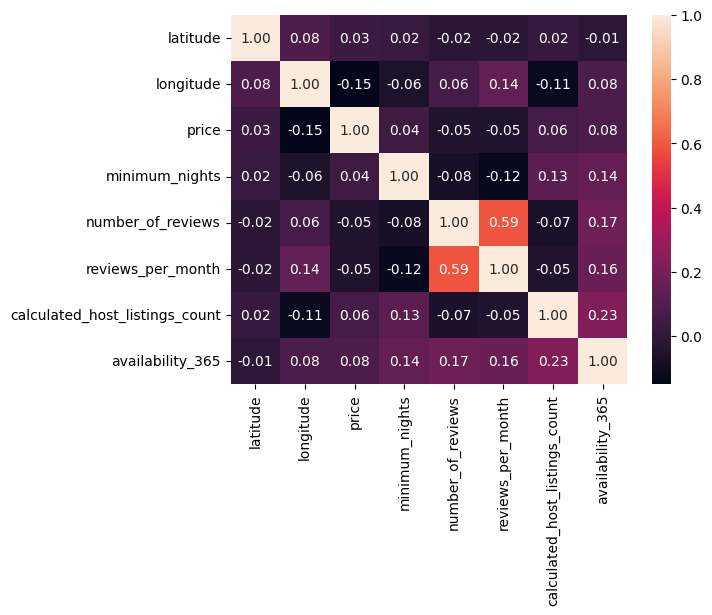

In [29]:
numeric_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

df_numeric = df[numeric_cols]
sns.heatmap(df_numeric.corr(), fmt='.2f', annot = True)
plt.show()

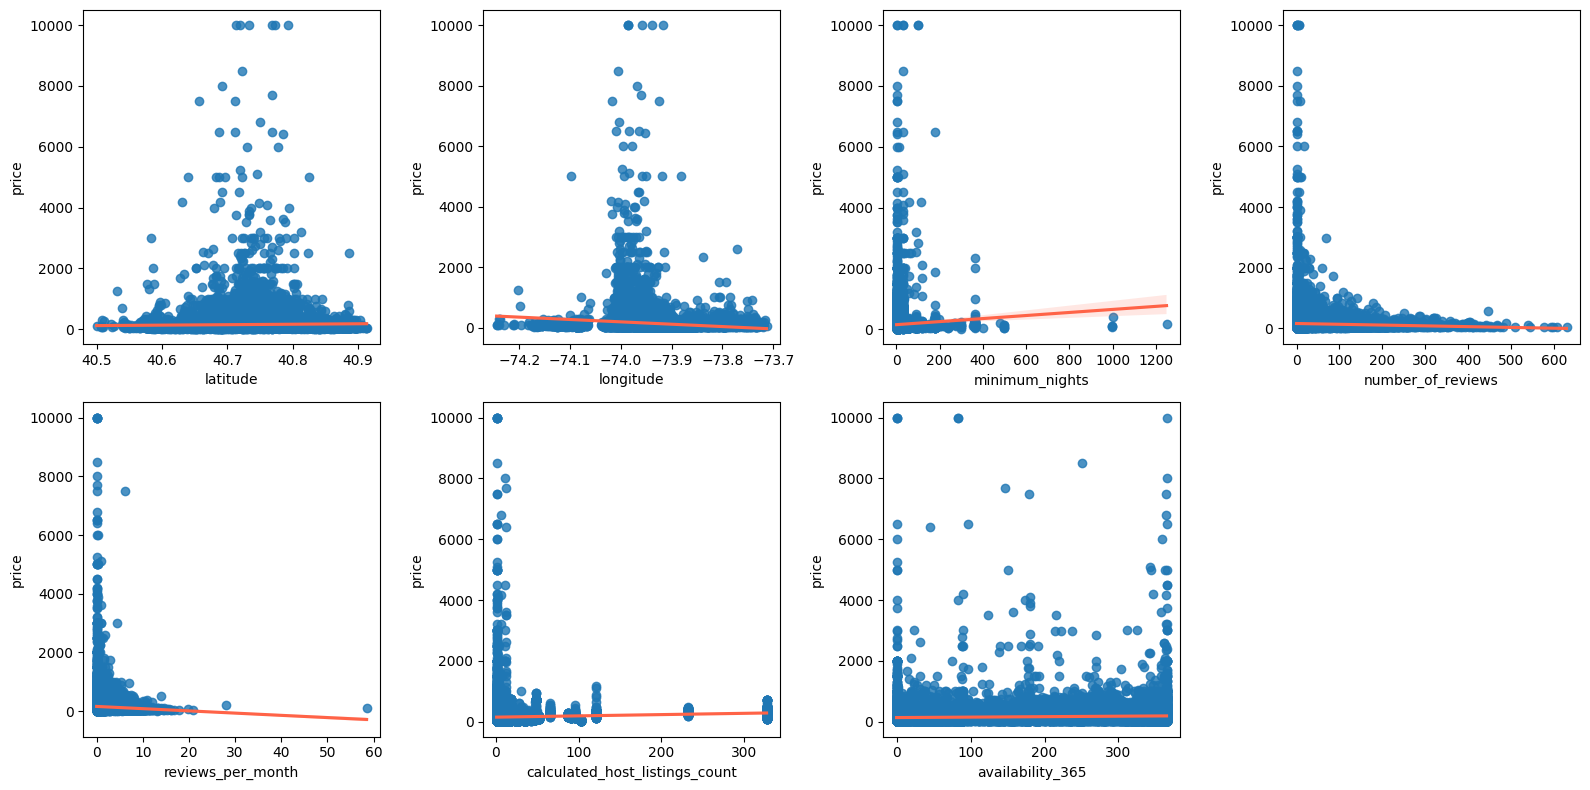

In [30]:
nrows = 2
ncols = 4
size_in = 4

fig = plt.figure(figsize=(size_in*ncols, size_in*nrows))
ax = []

cols_to_compare = [col for col in numeric_cols if col != 'price']

for i, col in enumerate(cols_to_compare): 
    current_ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.append(current_ax)
    sns.regplot(data=df, x=col, y='price' ,ax=ax[i], line_kws={'color':'tomato'})

plt.tight_layout()

### categoric - categoric

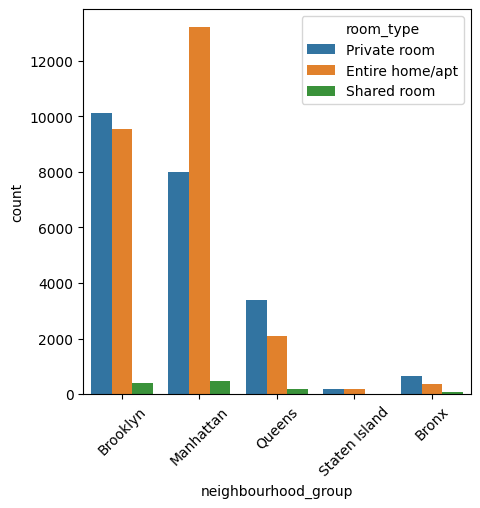

In [31]:
from itertools import combinations
from math import comb

categ_cols = ['neighbourhood_group', 'room_type']
df_categ = df[categ_cols+['neighbourhood']]
combinat = combinations(categ_cols,2)


ncols = comb(len(categ_cols), 2)
nrows = comb(len(categ_cols), 2)
size_inc = 5

fig = plt.figure(figsize=(size_inc*ncols, size_inc*nrows))
ax = []

for i, (x, hue) in enumerate(combinat):
    ax.append(fig.add_subplot(nrows, ncols, i+1))
    sns.countplot(data=df_categ, x=x, hue=hue, ax=ax[i])

plt.xticks(rotation=45)
sns.countplot()
plt.show()

### numerical - categorical

For this step we will encode the categorical data into numerical data.

For room_type, neighbourhood and last_review we will order each group first by number of appearances of each category inside each column, for instance, most apartments are in Manhattan followed by Brooklyn so both places will get encoded to 0 and 1 respectively.

for neighbourhood group we will use one-hot-encoding since it has only five categories

In [32]:
df_categ.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

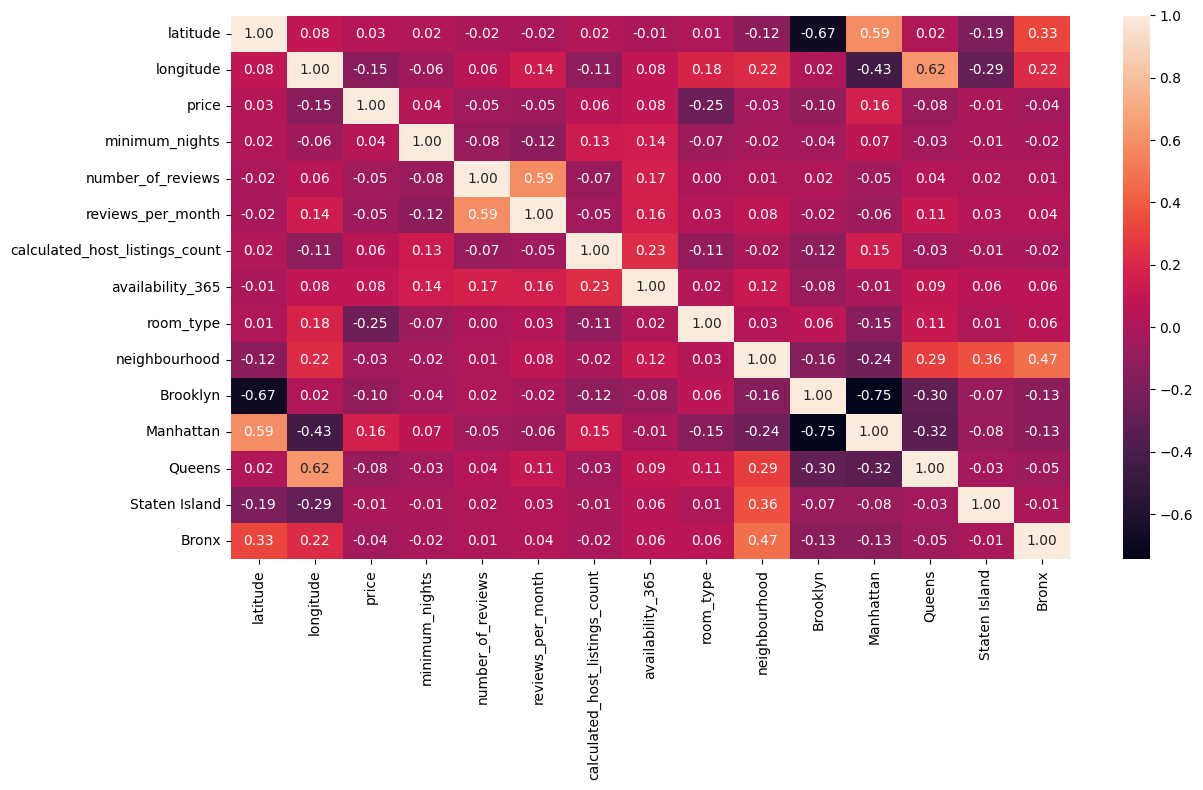

In [33]:
# the values in mappings are dictionaries with the encoding numbers for its respctive column
# the method DataFrame.value_counts() is really helpful here because it returns a Series ordered by count.  
mapings = {
    'room_type' : {type_of_room: n for n, type_of_room in enumerate(df.room_type.value_counts().index)},
    'neighbourhood' : {place: n for n, place in enumerate(df.neighbourhood.value_counts().index)},
}

df_cat_encod = df_categ.copy()

for column, encoding in mapings.items():
    df_cat_encod[column] = df_cat_encod[column].map(encoding)

neighbourhood_group_list = df_categ.neighbourhood_group.unique()
for neighbourhood_group in neighbourhood_group_list:
    df_cat_encod[neighbourhood_group] = df_cat_encod.neighbourhood_group == neighbourhood_group
df_cat_encod.drop(['neighbourhood_group'], axis=1, inplace=True)

df_cat_num = pd.concat([df_numeric,df_cat_encod], axis = 1)

fig, axis = plt.subplots(figsize = (13, 8))
sns.heatmap(df_cat_num.corr(), annot = True, fmt = ".2f")
plt.tight_layout()

plt.show()

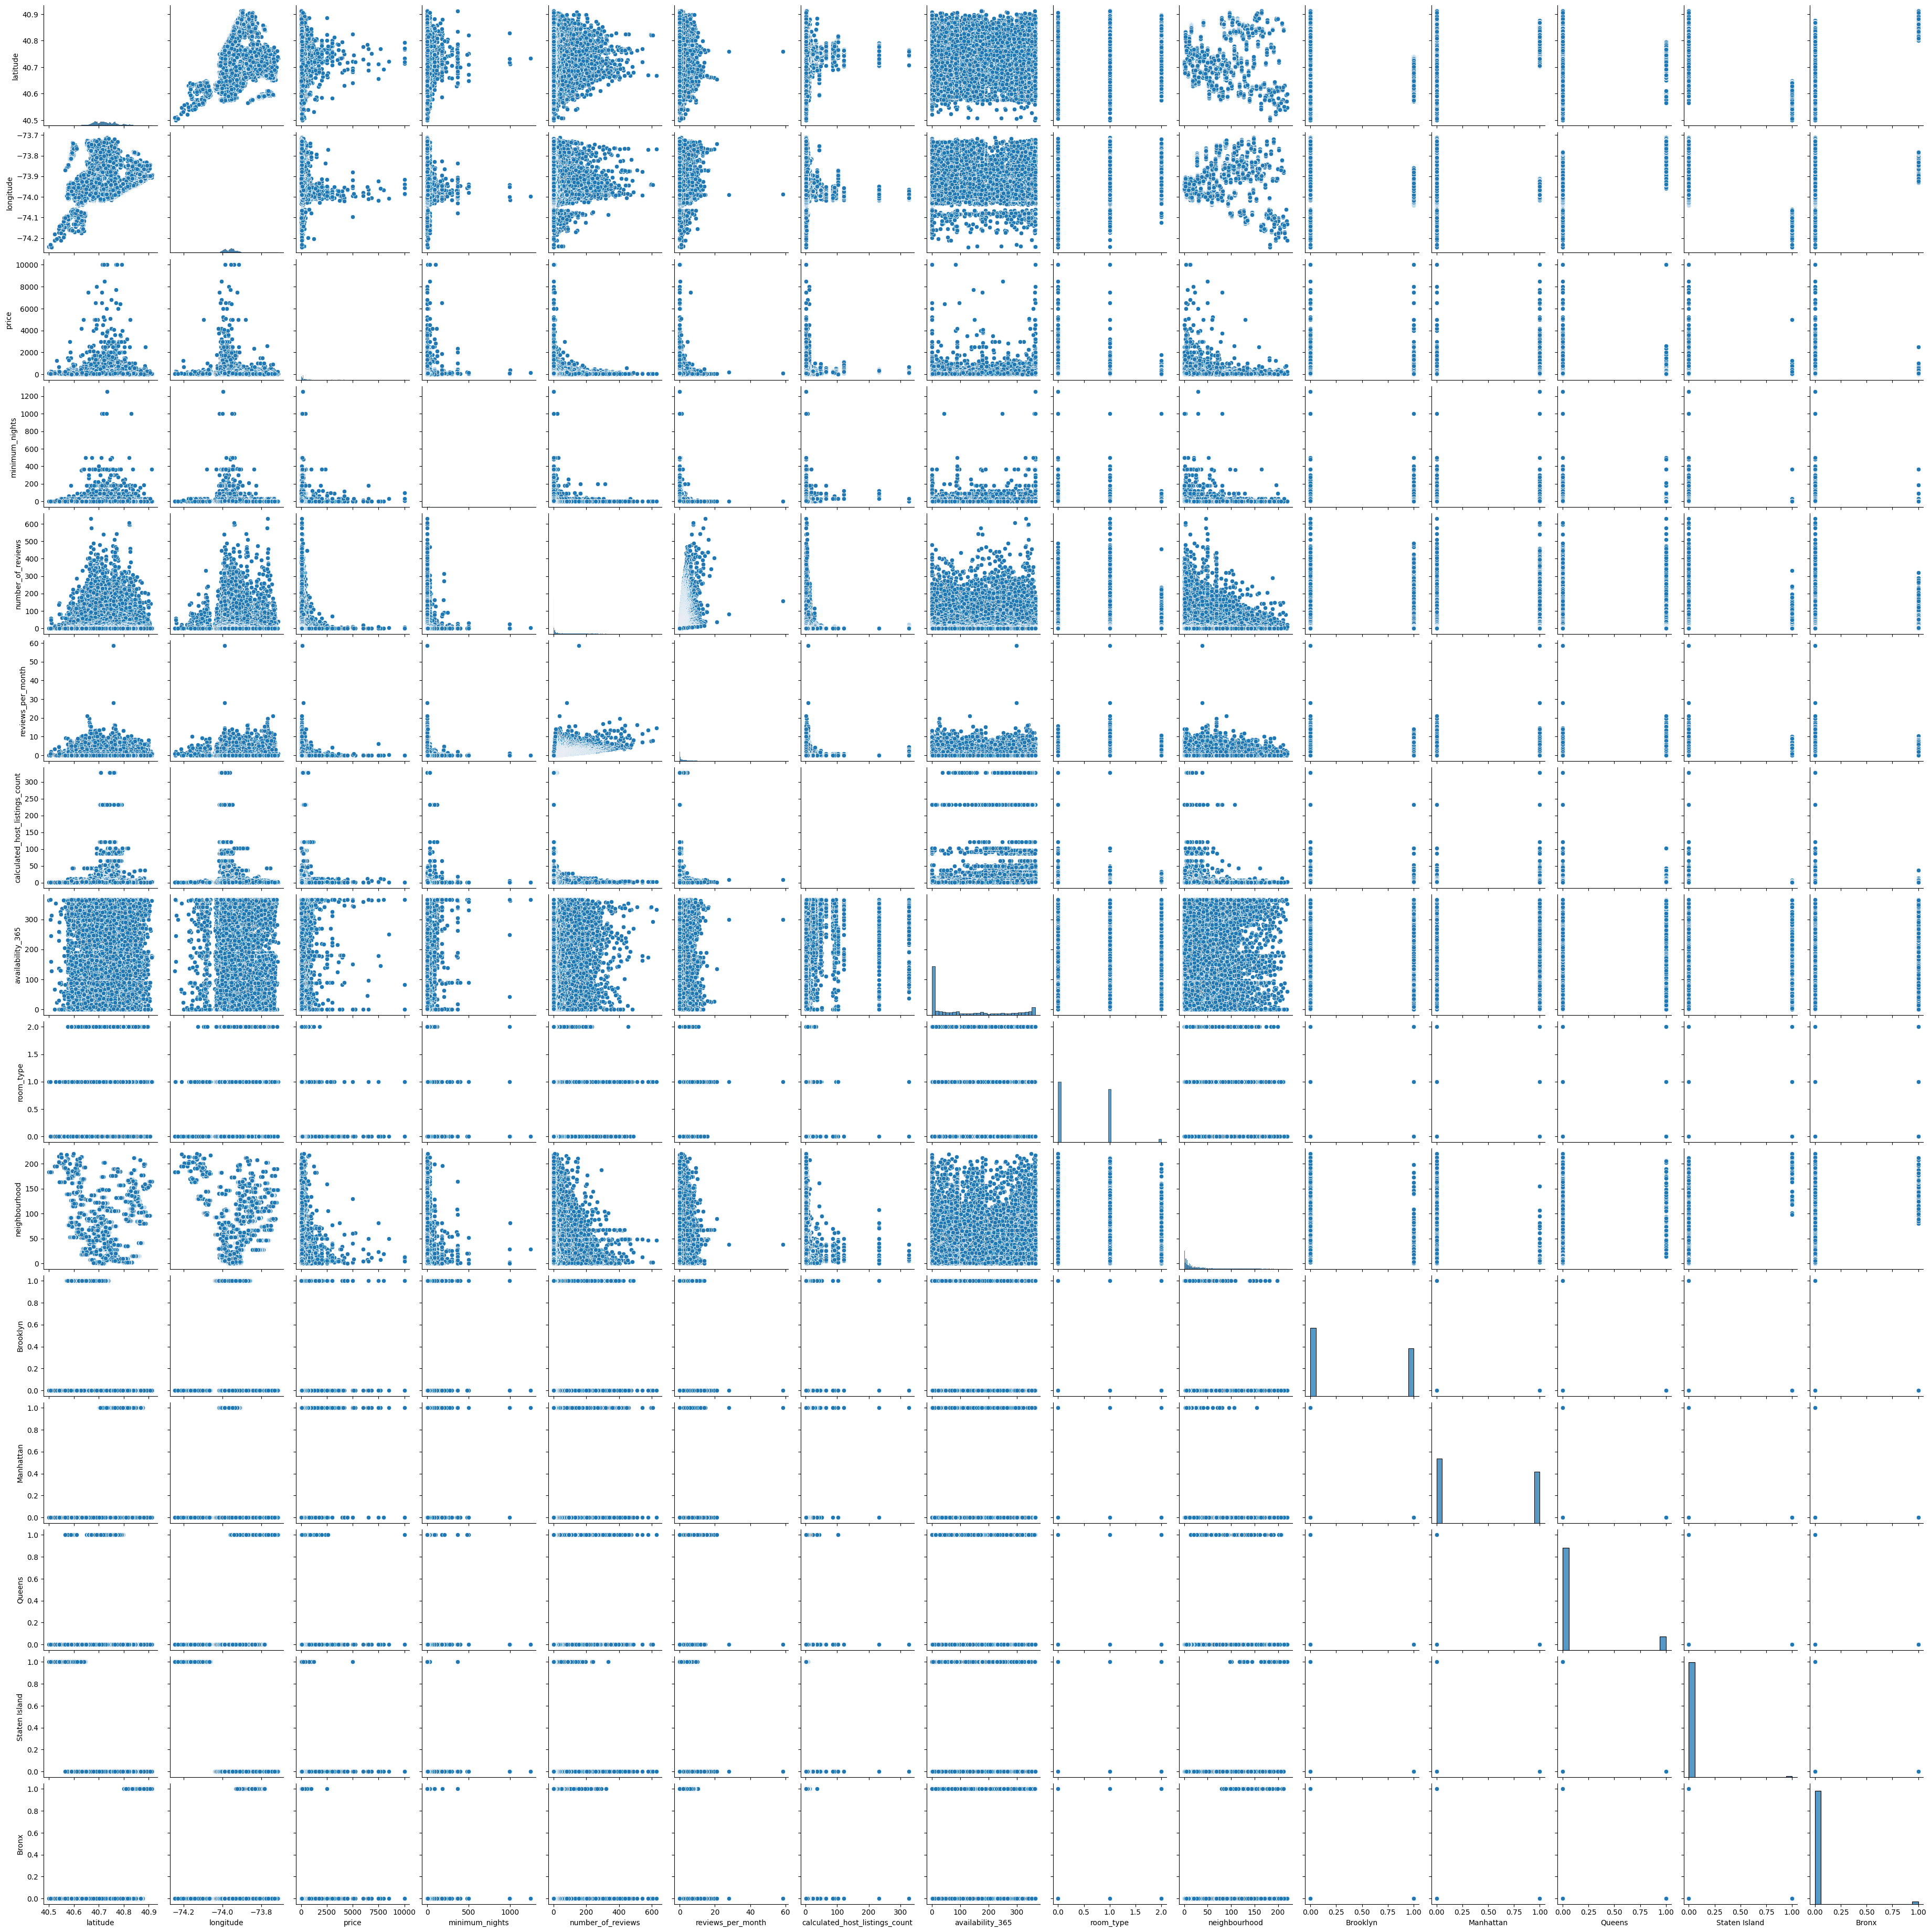

In [34]:
sns.pairplot(df_cat_num)
plt.show()

### Multivariate analysis obsevations

- 

## feature engineering

Outlier analysis

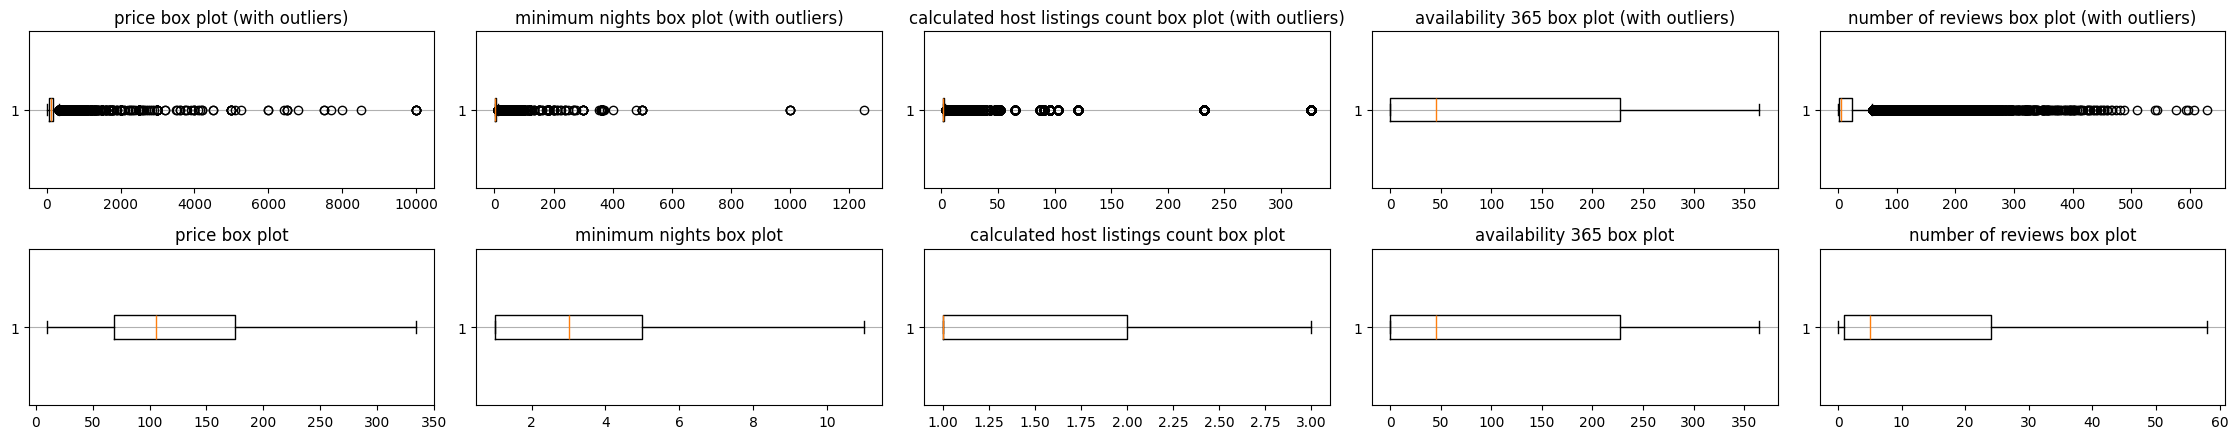

In [35]:
n = 2
m = 5
size_in = 4.5

fig, ax = plt.subplots(n,m)
fig.set_size_inches(size_in*m,size_in*n*0.5)

columns_to_graph = df[
    [
        'price',
        # 'room_type',
        'minimum_nights',
        'calculated_host_listings_count',
        'availability_365',
        # 'neighbourhood_group',
        'number_of_reviews'
    ]
]

for i, column in enumerate(columns_to_graph):
    column_name = column.replace('_',' ')

    ax[0,i].yaxis.grid(True)
    ax[0,i].boxplot(df[column],orientation='horizontal')
    ax[0,i].set_title(f'{column_name} box plot (with outliers)')
      
    ax[1,i].yaxis.grid(True)
    ax[1,i].boxplot(df[column], showfliers=False, orientation='horizontal')
    ax[1,i].set_title(f'{column_name} box plot')

plt.tight_layout()
plt.show()

In [36]:
def iqr_limits(df:pd.DataFrame, column, r = 1.5):

    df_description = df.describe()
    column_25 = df_description.loc['25%', column]
    column_75 = df_description.loc['75%', column]
    column_iqr = column_75 - column_25
    upper_lim = column_iqr*r + column_75
    down_lim = column_25 - column_iqr*r
    return (upper_lim, down_lim)

def outlier_df(df:pd.DataFrame, column):
    upper_lim, down_lim = iqr_limits(df, column)
    column_outliers = df[(down_lim > df[column]) | (df[column] > upper_lim)]
                                                                
    column_outliers = column_outliers.sort_values(column, ascending=False)
    return column_outliers

In [37]:
outlier_df(df, 'calculated_host_listings_count')['host_name'].value_counts()

host_name
Sonder (NYC)          327
Blueground            232
Kara                  125
Kazuya                103
Sonder                 96
                     ... 
The Manhattan Club      4
Giana                   4
Anisha                  3
Kimberly                3
Adeyemi                 3
Name: count, Length: 724, dtype: int64

In [38]:
price_outliers = outlier_df(df, 'price')
price_outliers.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0


In [39]:
minimum_nights = outlier_df(df, 'minimum_nights')
minimum_nights[['price','minimum_nights']].describe()

,price,minimum_nights
count,6605.000000,6605.000000
mean,173.307040,34.717335
std,377.363057,46.966268
min,10.000000,12.000000
25%,65.000000,28.000000
50%,120.000000,30.000000
75%,195.000000,30.000000
max,10000.000000,1250.000000


In [40]:
number_of_reviews = outlier_df(df, 'number_of_reviews')
number_of_reviews.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179


In [41]:
df[df.availability_365 == 0].shape

(17530, 15)

The price outliers because checking manually some of the data I got suspicious that many listings with big prices are typos o data not put right, nontheless i only 
- Deleted places with prices over 400 to avoind deleting too many outliers that may correspond to luxury bedrooms.
- Deleted the places with minimum nighs over 100 because those are likely places for rent, not places intended to be airbnbs in the usual sense, and also some of the pople who put big prices on places with a nights minimum somewhat big, probably did it because that was the price for the minimum amount of time to stay there. The reason why I think that is because I manually checked on maps some of the locations with places over 400 USD and most of the time I didn't see big houses in privileged places, actually, many  where listed as bedrooms and not even full houses and all of them where in regular parts of the city, for those places the minimum stay often was pretty big which led me to think that the price was big because it was the price for the minimum stay.

In [42]:
df = df[df.price < 400].copy()
df = df[df.minimum_nights < 100].copy()

df_cat_num = df_cat_num[df_cat_num.price < 400].copy()
df_cat_num = df_cat_num[df_cat_num.minimum_nights < 100].copy()



We already found some of the basic characteristics of the data, and we can notice somithing important, there is some correlation between the position and the price, we can see that from the graphs relating coordinates and price mut it becomes more noticeable from the heatmap of average prices.

Now if we want to get information that helps us to predict the price of a listing based on the information we have, we need first to check some things we can get but are not directly reflected on the data, namely, price by neighborhood, distance to landmarks and distance to airports.
I choose those because they embed information about the position without explicitly having to measure the distance from the room listed to every possible place in the grid 

To do the distance analysis I asked gemini for the coordinates of some landmarks and airports. that i will later use to find the euclidiean distance between those places and each listing.

I also added a "luxury_in_name" feature that is true for listings that have the word luxury in the name.

new fetures

In [43]:
nyc_locations = {
    "JFK": {"latitude": 40.6413, "longitude": -73.7781},
    "LGA": {"latitude": 40.7769, "longitude": -73.8740},
    "EWR": {"latitude": 40.6895, "longitude": -74.1745},

    "Times_Square": {"latitude": 40.7589, "longitude": -73.9851},
    "Central_Park": {"latitude": 40.7851, "longitude": -73.9683}, # Central point
    "Wall_Street": {"latitude": 40.7060, "longitude": -74.0088},

    "Bridge_Park": {"latitude": 40.6992, "longitude": -73.9990},
    "Coney_Island": {"latitude": 40.5755, "longitude": -73.9817}, # Focus on the amusement area
    "Corona_Park": {"latitude": 40.7460, "longitude": -73.8470}, # Near Unisphere
    "Astoria_Park": {"latitude": 40.7797, "longitude": -73.9231} # Waterfront park with city views
}

new_feat_df = df[[ 'latitude','longitude']].copy()

for location, coordinates in nyc_locations.items():
    landmark_latitude = coordinates['latitude']
    landmark_longitude = coordinates['longitude']
    column_distance_name = location + '_distance'

    latitude_diff = (new_feat_df.latitude - landmark_latitude)**2
    longitude_diff = (new_feat_df.longitude - landmark_longitude)**2

    new_feat_df[column_distance_name] = (latitude_diff + longitude_diff)**(1/2)


new_feat_df['luxury_in_name'] = df.name.str.lower().str.contains('luxury')

final_df = pd.concat([new_feat_df, df_cat_num], axis=1)
final_df


,latitude,longitude,JFK_distance,LGA_distance,EWR_distance,Times_Square_distance,Central_Park_distance,Wall_Street_distance,Bridge_Park_distance,Coney_Island_distance,...,reviews_per_month,calculated_host_listings_count,availability_365,room_type,neighbourhood,Brooklyn,Manhattan,Queens,Staten Island,Bronx
0,40.64749,-73.97237,0.194369,0.162553,0.206449,0.112135,0.137670,0.068924,0.058164,0.072592,...,0.21,6,365,1,52,True,False,False,False,False
1,40.75362,-73.98377,0.234341,0.112211,0.201220,0.005445,0.035076,0.053797,0.056511,0.178132,...,0.38,2,355,0,9,False,True,False,False,False
2,40.80902,-73.94190,0.234436,0.075114,0.261511,0.066168,0.035625,0.122836,0.123777,0.236887,...,0.00,1,365,1,2,False,True,False,False,False
3,40.68514,-73.95976,0.186875,0.125597,0.214784,0.077991,0.100324,0.053292,0.041683,0.111814,...,4.64,1,194,0,19,True,False,False,False,False
4,40.79851,-73.94399,0.228549,0.073250,0.254986,0.057088,0.027763,0.112953,0.113528,0.226176,...,0.10,1,0,0,10,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,0.175837,0.124278,0.224818,0.087720,0.108138,0.064946,0.053227,0.107811,...,0.00,2,9,1,1,True,False,False,False,False
48891,40.70184,-73.93317,0.166469,0.095578,0.241645,0.077153,0.090368,0.075744,0.065883,0.135340,...,0.00,2,36,1,3,True,False,False,False,False
48892,40.81475,-73.94867,0.243267,0.083715,0.258238,0.066681,0.035559,0.124267,0.126035,0.241519,...,0.00,1,27,0,2,False,True,False,False,False
48893,40.75751,-73.99112,0.242657,0.118714,0.195585,0.006178,0.035804,0.054460,0.058840,0.182254,...,0.00,6,2,2,5,False,True,False,False,False



## feature selection

we start by scalling the variables.

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = final_df.drop(columns='price')
y = final_df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled.head()

,latitude,longitude,JFK_distance,LGA_distance,EWR_distance,Times_Square_distance,Central_Park_distance,Wall_Street_distance,Bridge_Park_distance,Coney_Island_distance,...,reviews_per_month,calculated_host_listings_count,availability_365,room_type,neighbourhood,Brooklyn,Manhattan,Queens,Staten Island,Bronx
0,0.538679,0.490749,0.438128,0.260386,0.344082,0.099172,0.161839,0.091372,0.077354,0.407585,...,0.017094,0.000000,0.087671,0.0,0.027273,0.0,1.0,0.0,0.0,0.0
1,0.468556,0.470712,0.441181,0.312780,0.311499,0.181389,0.240120,0.057200,0.011759,0.328057,...,0.003419,0.000000,0.010959,0.0,0.250000,1.0,0.0,0.0,0.0,0.0
2,0.727128,0.527298,0.488772,0.196563,0.451480,0.123877,0.035456,0.332984,0.333041,0.628938,...,0.000513,0.003067,0.515068,0.5,0.018182,0.0,1.0,0.0,0.0,0.0
3,0.534614,0.504303,0.422534,0.248053,0.360595,0.105395,0.162192,0.108528,0.086928,0.402804,...,0.072137,0.000000,0.805479,0.5,0.027273,0.0,1.0,0.0,0.0,0.0
4,0.852373,0.863929,0.412986,0.237375,0.896894,0.596643,0.484020,0.850920,0.827926,0.945121,...,0.029573,0.000000,0.473973,0.5,0.609091,0.0,0.0,0.0,0.0,1.0


we select here the best 8 features.

In [45]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=8)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

X_train_selected = pd.DataFrame(X_train_selected, columns=X_train.columns[selector.get_support()])
X_test_selected = pd.DataFrame(X_test_selected, columns=X_test.columns[selector.get_support()])
X_train_selected.head()

,luxury_in_name,calculated_host_listings_count,availability_365,room_type,Brooklyn,Manhattan,Queens,Bronx
0,0.0,0.000000,0.087671,0.0,0.0,1.0,0.0,0.0
1,0.0,0.000000,0.010959,0.0,1.0,0.0,0.0,0.0
2,0.0,0.003067,0.515068,0.5,0.0,1.0,0.0,0.0
3,0.0,0.000000,0.805479,0.5,0.0,1.0,0.0,0.0
4,0.0,0.000000,0.473973,0.5,0.0,0.0,0.0,1.0


finally we save our data

In [46]:
X_train_selected['price'] = list(y_train)
X_test_selected['price'] = list(y_test)

X_train_selected.to_csv('../data/processed/train_selected.csv', index=False)
X_test_selected.to_csv('../data/processed/test_selected.csv', index=False)